# 随机森林详解
随机森林是一种有监督学习算法，是以决策树为基学习器的集成学习算法。既可以做分类(Classification)，又可以做回归(Regression)。
## 随机森林几点特性
1. 两个随机
    - 在构建决策树时，是采用有放回的随机抽样（bagging）。比如原始数据中包含150个样本，现在在构建第一棵决策树时从中选取了第10号样本，然后把他再放回去原始数据中进行第二次抽样选取了20号样本，然后把他再放回去原始数据中进行第三次抽样选取了15号样本，然后把他再放回去原始数据中进行第四次抽样，这时不小心又抽到了第10号样本。以此类推抽足150个样来构建第一棵决策树。这种的抽样的特点是：**用于做决策树的样本存在重复，而且大概在150个样本中大约有3分之1的样本不会被抽取到**。
      
    - 在决策树分裂过程中特征值的选择随机。比如原始数据中包含10个用于训练的特征，在决策树想要从顶点开始分裂时，他得找一个使gini系数最小的特征来进行分裂。我们可以给他限定死只让他从部分特征中选择一个。一般这个范围是sqrt(n_features) 也就是所有特征的平方根个。在这个例子中范围就是3个，也就是说，在决策树进行的每一次分裂中特征都只能三选一。
2. 随机森林存在一个用于衡量模型优劣的参数：OOB(out-of-bag)。由于在进行抽样过程中有大概3分之1的样本（称为袋外数据）不会被抽取到，那这3分之1的样本就可以用于模型的测试。
3. 将生成的多棵决策树组成随机森林。对于分类问题，按照多棵树分类器投票决定最终分类结果（取众数）；对于回归问题，由多棵树预测值的均值决定最终预测结果（取平均值）。有另外一种随机森林叫分位数随机森林，对于预测结果他取的是所有树结果的中位数。
4. 由于每棵决策树都是独立的，所以可以并行随机森林的运算。
## 从头构建随机森林

E:\ProgramData\miniconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.


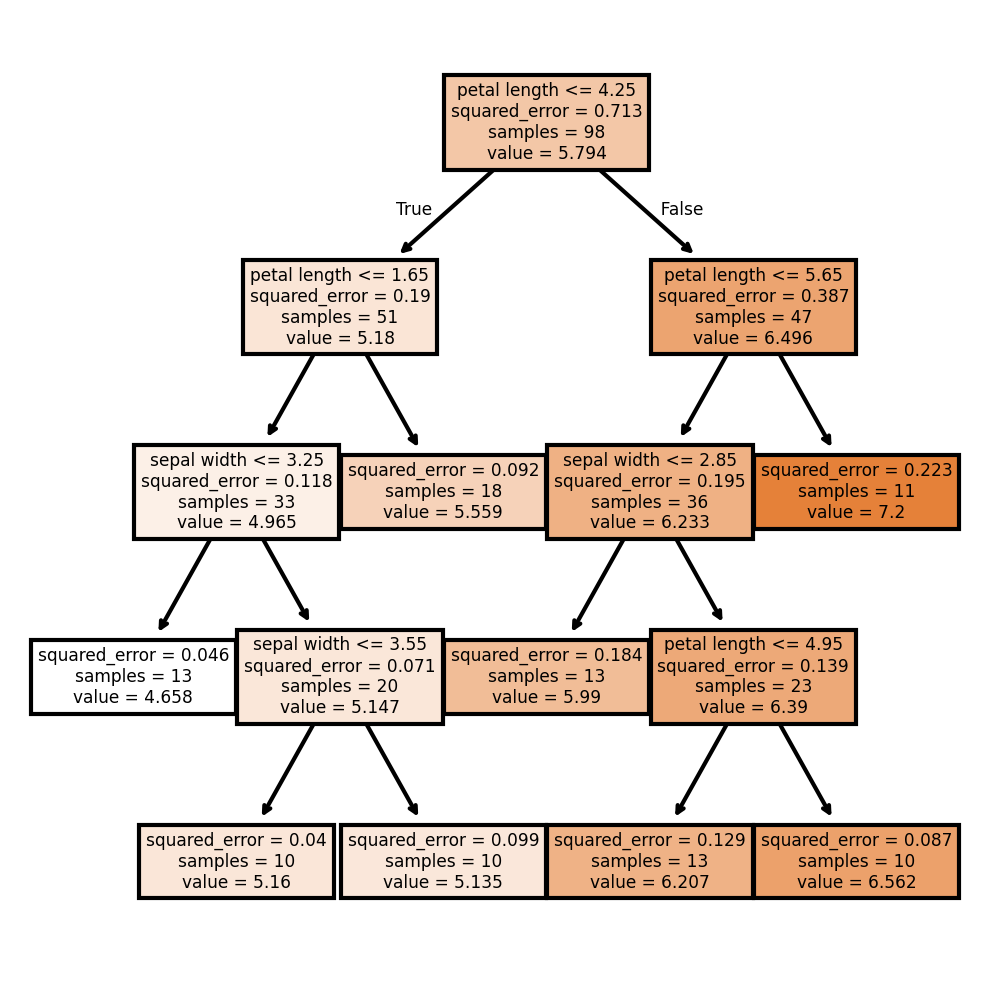

In [116]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn import tree
import dtreeviz
import pandas as pd

iris = load_iris()
data = pd.DataFrame(iris.data)
X = data.iloc[:,1:4]
y = data.iloc[:,0] #构建随机森林回归使用 sepal length 作为响应变量
fn=["sepal width","petal length","petal width"]
cn ="sepal length"
clf = RandomForestRegressor(max_depth=4,random_state=2024,min_samples_leaf=10,n_estimators=3,oob_score=True )
clf.fit(X, y)
model = clf.estimators_[0]
no_dup = list(set(clf.estimators_samples_[0]))
X_in = X.loc[no_dup]
y_in = y.loc[no_dup]
viz_model = dtreeviz.model(model,
                           X_train = X_in,
                           y_train  = y_in,
                           feature_names=fn,
                           target_name=cn)
v = viz_model.view()     # render as SVG into internal object 
v.show()                 # pop up window

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               filled = True);

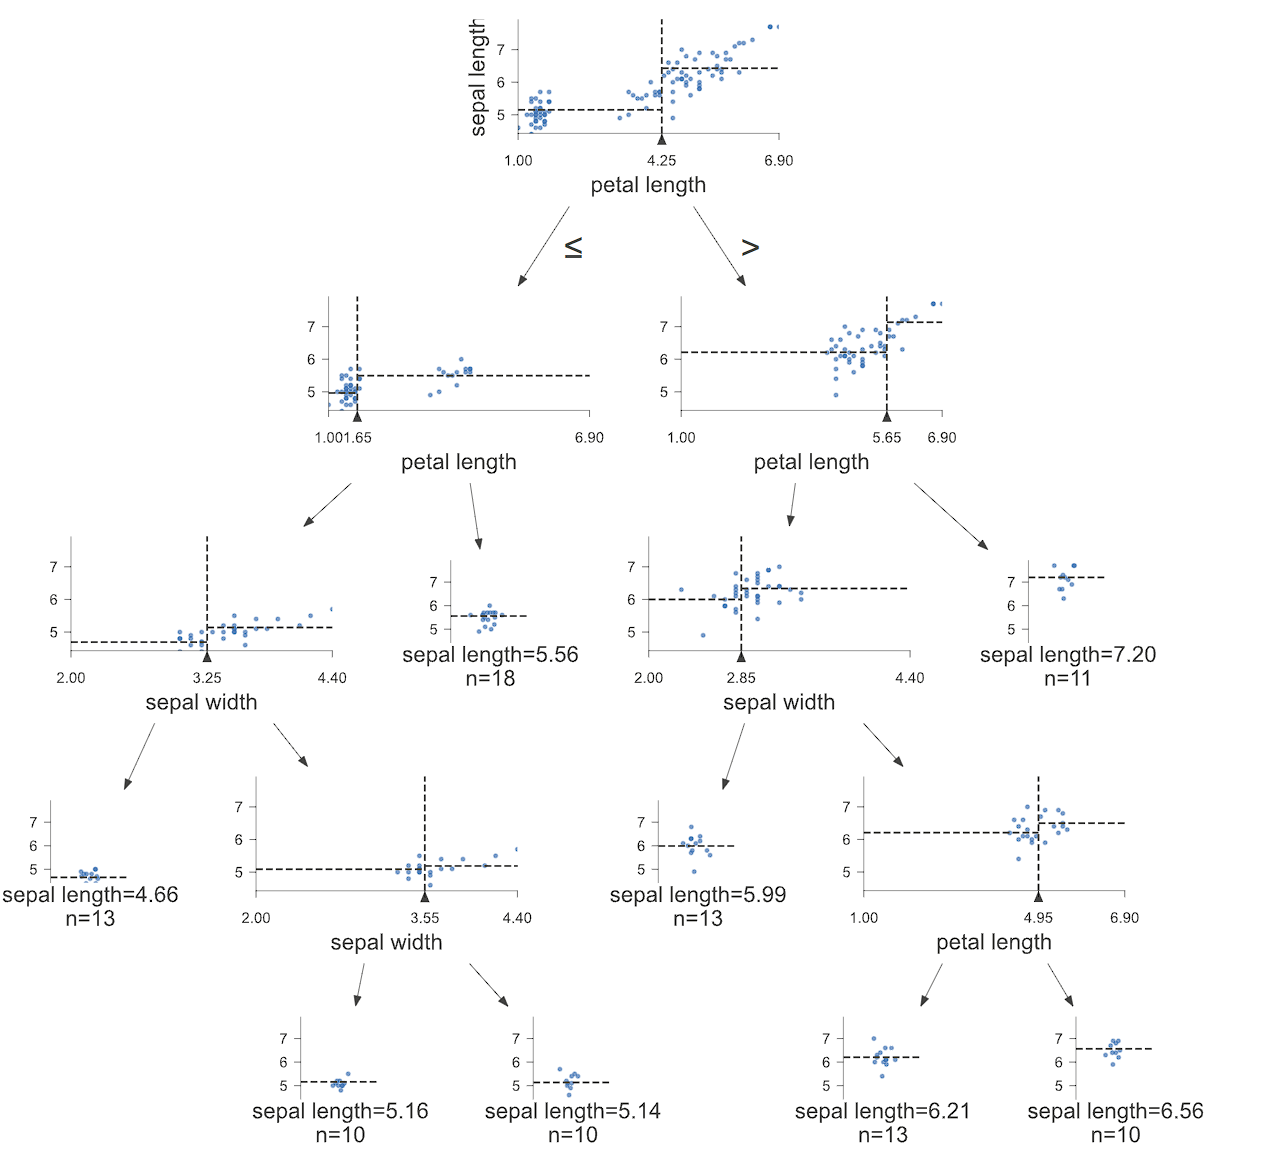

## 代码解释
```python
X = data.iloc[:,1:4]
y = data.iloc[:,0]
```
使用 sepal length 作为响应变量,其他数值类变量作为自变量
```python
clf = RandomForestRegressor(max_depth=4,random_state=2024,min_samples_leaf=10,n_estimators=3,oob_score=True )
```
构建回归类型的随机森林
参数解释：
1. n_estimators：要构建决策树的数量是多少。一般设置为500
2. max_depth：决策树的最大深度是多少，也就是这个树有多少层。太深的话容易过拟合
3. min_samples_split：决策树的节点在发生分裂时要求的最小样本数。如果节点包含的样本数小于指定的min_samples_split就不继续往下分裂了。
4. min_samples_leaf：叶子包含的最少样本数。就是叶子最后样本数必须要大于这个参数的值。（啥叫叶子，可以看决策树的图，没有向下的箭头了的方块就叫叶子）
5. max_features：在寻找最佳分割时要考虑的特征数量。如上所说，一般用sqrt
6. random_state: 随机种子
```python
model = clf.estimators_[0]
```
从随机森林中选择第一棵决策树
```python
no_dup = list(set(clf.estimators_samples_[0]))
X_in = X.loc[no_dup]
y_in = y.loc[no_dup]
```
由于决策树中存在重复样本，而在下面进行决策树可视化时又需要输入训练数据。所以要去下重
## 数据验证
查看一棵决策树的详细信息
1. 查看随机森林中第一棵树使用到的样本索引

In [12]:
print(clf.estimators_samples_[0])

[ 18  85  87 144  20  13 141  33 121  36 122  62   3   4  29   4  25  88
  36 107   9  60  40 112   0  55  94  13  81 118  95 101  97  99  70  16
  17 137  23 120   3   7  21  38  85  49 108 141 109  64  73 126 133 141
  22   4  37  69  18  96  59  79 139  45  42 142 148  60 142  91  58 100
  95  27 125  80  47  35   4  36  83  27 137 102 128 109  30  43  32  62
  17  51  30  99 107 112  46  99 117  55  32 127 122  11  62 138 149  28
 142  75  37  27 115 116 108  99  22  77  15 118  84  50 100  62 103 121
  56 122  30  51  63  76 106 122  12 134  57  76  38   2  47  10 133  15
 142 103  23  77  18   5]


In [13]:
print(sorted(clf.estimators_samples_[0]))

[0, 2, 3, 3, 4, 4, 4, 4, 5, 7, 9, 10, 11, 12, 13, 13, 15, 15, 16, 17, 17, 18, 18, 18, 20, 21, 22, 22, 23, 23, 25, 27, 27, 27, 28, 29, 30, 30, 30, 32, 32, 33, 35, 36, 36, 36, 37, 37, 38, 38, 40, 42, 43, 45, 46, 47, 47, 49, 50, 51, 51, 55, 55, 56, 57, 58, 59, 60, 60, 62, 62, 62, 62, 63, 64, 69, 70, 73, 75, 76, 76, 77, 77, 79, 80, 81, 83, 84, 85, 85, 87, 88, 91, 94, 95, 95, 96, 97, 99, 99, 99, 99, 100, 100, 101, 102, 103, 103, 106, 107, 107, 108, 108, 109, 109, 112, 112, 115, 116, 117, 118, 118, 120, 121, 121, 122, 122, 122, 122, 125, 126, 127, 128, 133, 133, 134, 137, 137, 138, 139, 141, 141, 141, 142, 142, 142, 142, 144, 148, 149]


2. 查看随机森林中每棵树节点分裂使用的样本数

In [11]:
print(clf.n_features_in_)

3


3. 查看随机森林袋外分数

In [63]:
print(clf.oob_score_)

0.8018097425111417


4. 查看特征重要性

In [101]:
print(["sepal width","petal length","petal width"])
print(clf.feature_importances_)

['sepal width', 'petal length', 'petal width']
[0.         0.01333333 0.56405596 0.42261071]


5. 使用决策树可视化简单观察一个样本数据的决策路径

In [14]:
print(y_in[0])
viz_model2 = dtreeviz.model(model,
                           X_train = X_in,
                           y_train  = y_in,
                           feature_names=fn,
                           target_name=cn)
v2 = viz_model2.view(x=list(X.iloc[0]))     #需要注意这里一定要使用list转换成列表，不然图会错，已和作者提issue 
v2.show()                                   # pop up window

5.1


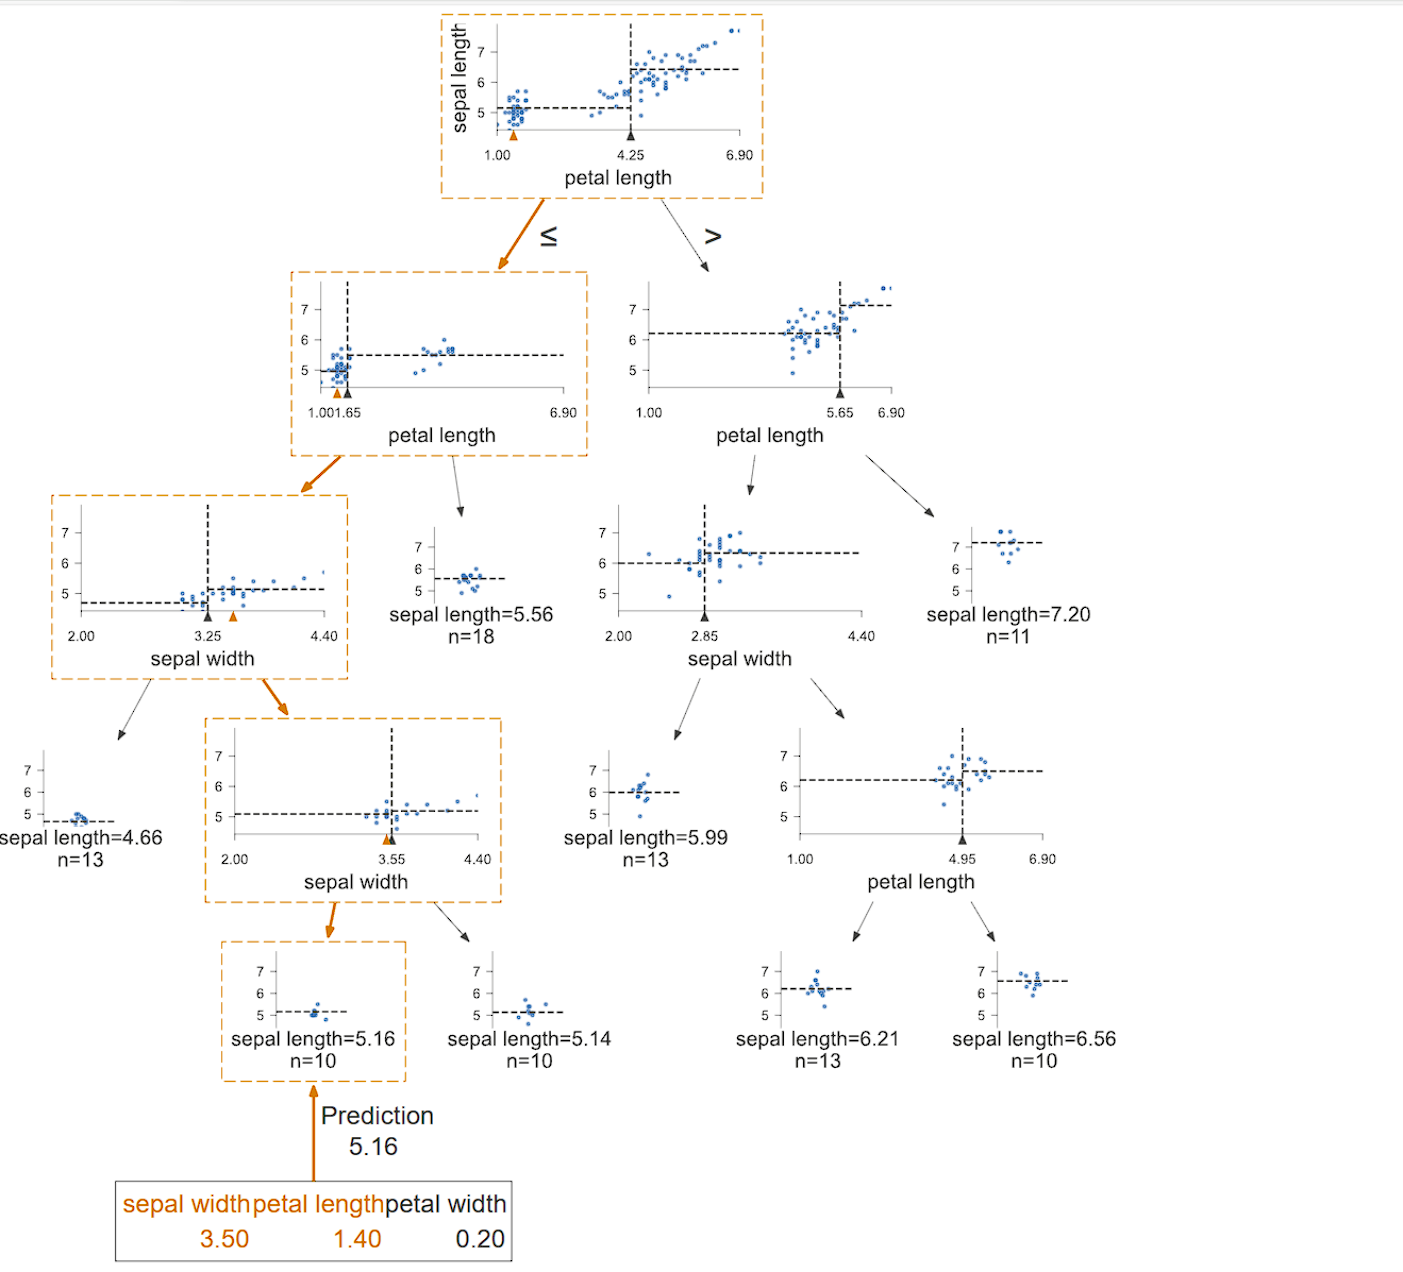

6. 将模型中的3棵树都展示出来

In [16]:
v2 = viz_model2.view(x=list(X.iloc[0]),show_just_path=True)
v2.show() 
model = clf.estimators_[1]
no_dup = list(set(clf.estimators_samples_[1]))
X_in = X.loc[no_dup]
y_in = y.loc[no_dup]
viz_model3 = dtreeviz.model(model,
                           X_train = X_in,
                           y_train  = y_in,
                           feature_names=fn,
                           target_name=cn)
v3 = viz_model3.view(x=list(X.iloc[0]),show_just_path=True) 
v3.show() 
model = clf.estimators_[2]
no_dup = list(set(clf.estimators_samples_[2]))
X_in = X.loc[no_dup]
y_in = y.loc[no_dup]
viz_model4 = dtreeviz.model(model,
                           X_train = X_in,
                           y_train  = y_in,
                           feature_names=fn,
                           target_name=cn)
v4 = viz_model4.view(x=list(X.iloc[0]),show_just_path=True) 
v4.show() 

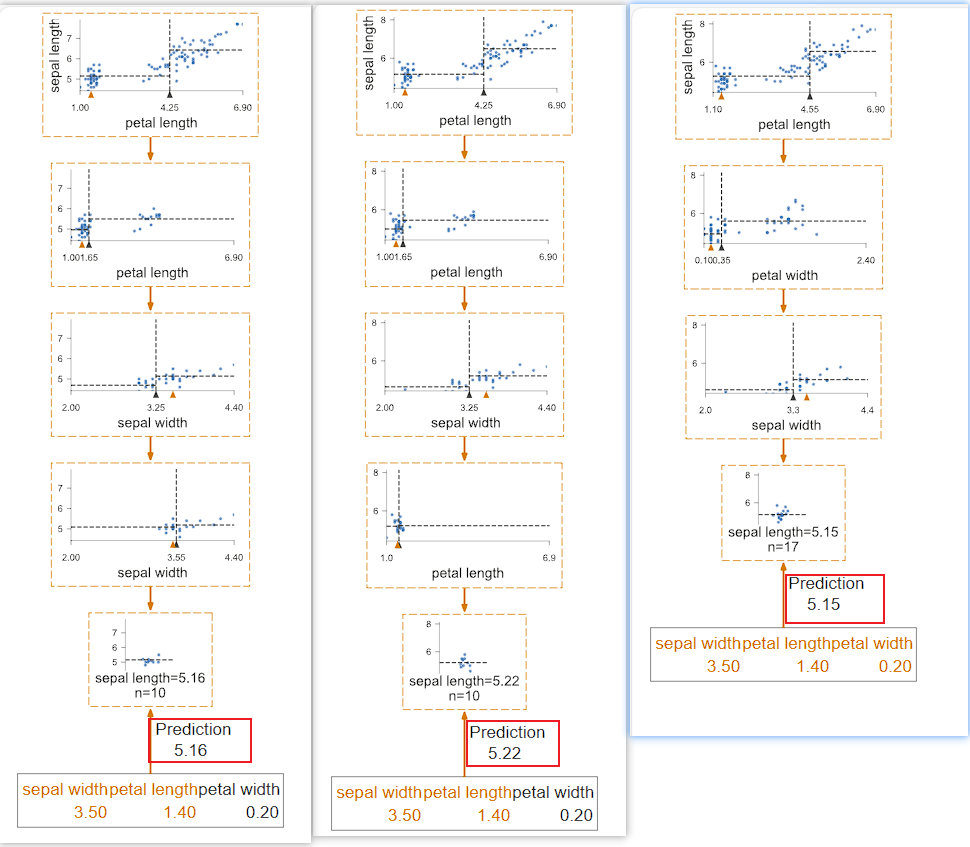

6. 查看一个样本的决策路径，其实就是上面图中所示，它使用了模型返回的数据。

In [110]:
node_indicator = model.decision_path([[3.5,1.4,0.2]])
node_index = node_indicator.indices
print("决策路径为：",node_index)

决策路径为： [0 1 2 4 5]


决策路径中节点的索引顺序是：先数左边叶子，再数右边叶子。
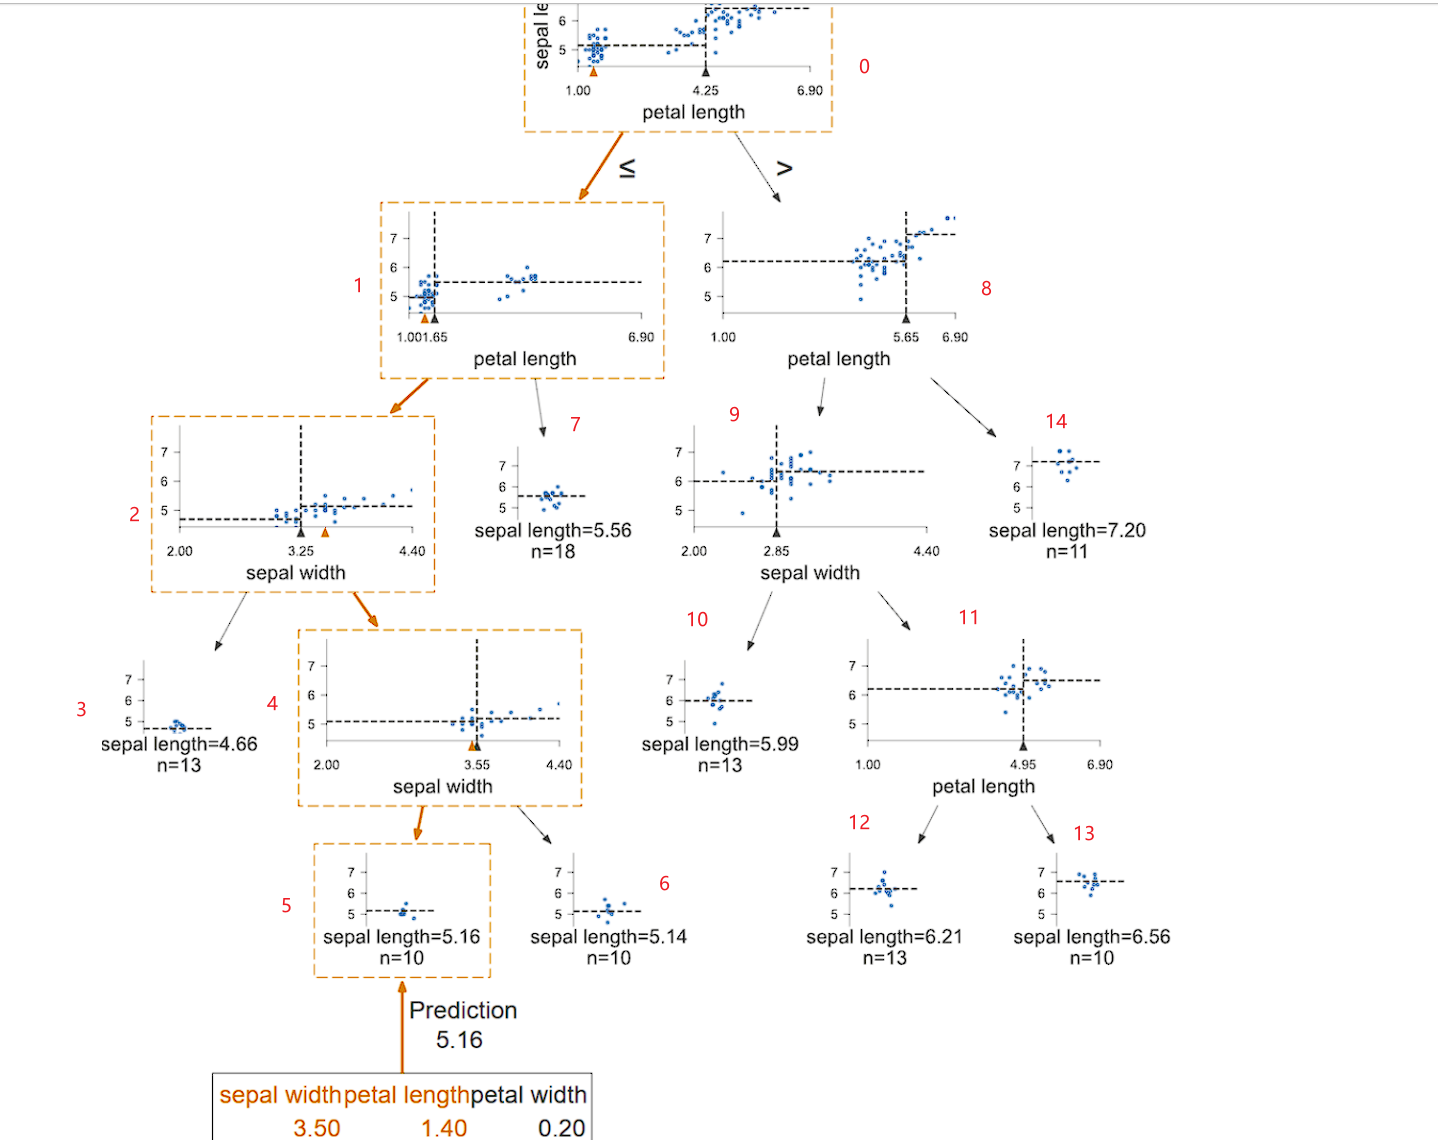

7. 进行模型的预测，观察预测结果是否和我们手动计算一致

In [117]:
print(clf.predict([[3.5,1.4,0.2]]))
(5.16+5.22+5.15)/3

[5.176]


5.176666666666667